# <center>Titanic Survivor Prediction Model</center>

Pousser les corrélations !

Regarder les outliers.

## <center>Librairies Importation</center>

In [776]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

***

## <center>Dataset Importation</center>

In [777]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

***

## <center>Exploratory Data Analysis</center>

### General Look

In [778]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [779]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [780]:
gender_submission.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### General Infos

In [781]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [782]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Missing Values

In [783]:
train.isnull().sum()*100/(len(train))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Stats

In [784]:
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


### Variables Exploration and Distribution

Variable|Definition|Key|
----|----|----|
Survival|Survival|0 = No, 1 = Yes|
Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
Sex|Sex||
Age|Age in years||
Sibsp|# of siblings / spouses aboard the Titanic||
Parch|# of parents / children aboard the Titanic||
Ticket|Ticket number||
Fare|Passenger fare||
Cabin|Cabin number||
Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [785]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

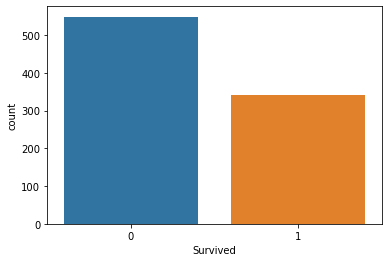

In [786]:
sns.countplot(x="Survived", data=train)

In [787]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

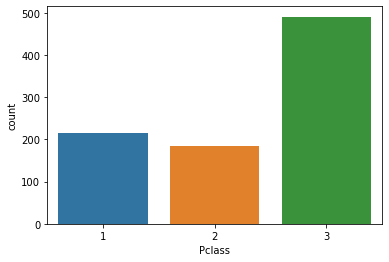

In [788]:
sns.countplot(x="Pclass", data=train)

In [789]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

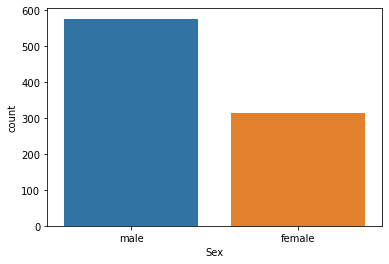

In [790]:
sns.countplot(x="Sex", data=train)

In [791]:
train["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

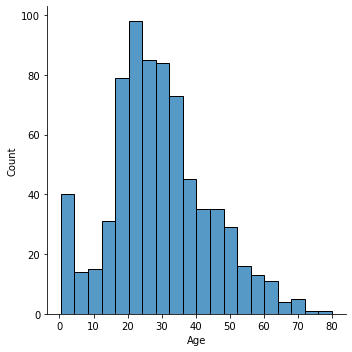

In [792]:
sns.displot(data=train, x="Age")

In [793]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

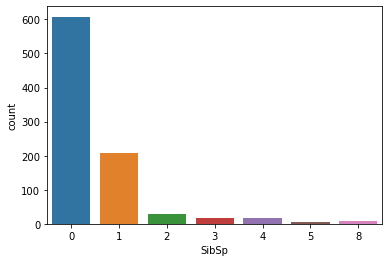

In [794]:
sns.countplot(x="SibSp", data=train)

In [795]:
train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

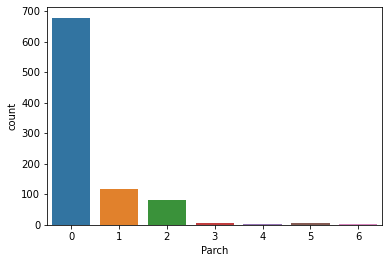

In [796]:
sns.countplot(x="Parch", data=train)

In [797]:
train["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [798]:
train["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

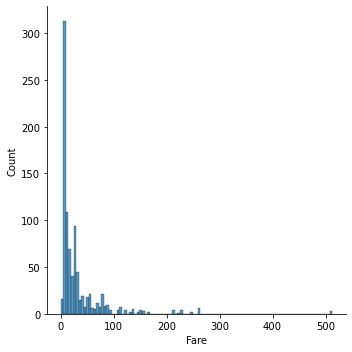

In [799]:
sns.displot(data=train, x="Fare")

In [800]:
train["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [801]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

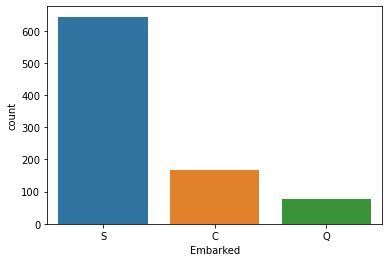

In [802]:
sns.countplot(x="Embarked", data=train)

In [803]:
train["Name"].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

### Correlation

In [804]:
traincorr = train.corr()

def HIGHLIGHT_COLOR(x):
    def colour_switch(number):
        if number >= 0.50 and number <= 0.90:
            color = "green"
        elif number <= -0.50 and number >= -0.90:
            color = "blue"
        elif number >= 0.90:
            color = "red"
        elif number <= -0.90:
            color = "red"

        else:
            # default
            color = "white"
            
        return color

    return [f'background-color: {colour_switch(number)}' for number in x]

traincorr.style.apply(HIGHLIGHT_COLOR)

#There are NaN because data does not varies.
#Correlation formula --> cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [805]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Outliers

In [806]:
s = train["Age"]
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

print("Age")
print("Lower", iqr_lower)
print("Upper", iqr_upper)
print("Min", train['Age'].min())
print("Max", train['Age'].max())
print("\n")

s = train["Fare"]
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

print("Fare")
print("Lower", iqr_lower)
print("Upper", iqr_upper)
print("Min", train['Fare'].min())
print("Max", train['Fare'].max())
print("\n")

Age
Lower -6.6875
Upper 64.8125
Min 0.42
Max 80.0


Fare
Lower -26.724
Upper 65.6344
Min 0.0
Max 512.3292




In [807]:
train[train["Fare"] > 65.23]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


***

### Notes

-There are some missing values on this values:

    Age (19.86%)
    Cabin (77.10%)
    Embraked (0.22%)
    
-There are differents types of variables:

    int
    float
    object
   
-There are 10 features:

    PassengerId
    Survived
    Pclass
    Name
    Sex
    Age
    SibSp
    Parch
    Ticket
    Fare
    Cabin
    Embarked
    Name
    
-In regards to the summary satistics:

    We can see in "Age" that the min value is "0.42", we have this kind of values because of babies under 1 years old.
    In the feature "SibSp" the max value is 8, it's strange, does it means that someone has 8 spouses ?
    For the feature "Fare" we can see that the min values are 0, maybe it refere to employees ?
    
-Some features doesn't seems to be very usefull:

    PassengerId
    Name
    Ticket
    Cabin
    
-In the numerical correlation we can see that there not strong relationships. Of course we can see that there are an anti corraltion between "Fare" and Pclass.

So, I know now that the features "Name", "Ticket" and "Cabin" can be removed. Furthermore "Cabin" had 77.10% of missing values.

-For the ouliers, there are some value above the upper IQR for "Age" and "Fare" but nothings to drop.

***

## <center>Data Modifications</center>

### Dropping Useless Features

In [808]:
train.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)

### Features Encoding

In [809]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
le = preprocessing.LabelEncoder()
train["Sex"] = lb.fit_transform(train["Sex"])
train["Embarked"] = le.fit_transform(train["Embarked"])

### x / y Split

In [810]:
y = train["Survived"]
x = train.drop(["Survived"], axis = 1)

### Filling NaN with KNN Imputer and GridSearchCV

In [811]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.linear_model import SGDClassifier

model = make_pipeline(KNNImputer(), SGDClassifier())

parameters = {"knnimputer__n_neighbors" : [1, 2, 3, 4, 5]}

grid = GridSearchCV(model, param_grid = parameters, cv = 5)

grid.fit(x, y)

grid.best_params_

{'knnimputer__n_neighbors': 4}

In [812]:
from sklearn.impute import KNNImputer

knni = KNNImputer(n_neighbors = 4)

x = knni.fit_transform(x)

In [813]:
x = pd.DataFrame(data = x)
x.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [814]:
x

,0,1,2,3,4,5,6,7
0,1.0,3.0,1.0,22.00,1.0,0.0,7.2500,2.0
1,2.0,1.0,0.0,38.00,1.0,0.0,71.2833,0.0
2,3.0,3.0,0.0,26.00,0.0,0.0,7.9250,2.0
3,4.0,1.0,0.0,35.00,1.0,0.0,53.1000,2.0
4,5.0,3.0,1.0,35.00,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,887.0,2.0,1.0,27.00,0.0,0.0,13.0000,2.0
887,888.0,1.0,0.0,19.00,0.0,0.0,30.0000,2.0
888,889.0,3.0,0.0,27.25,1.0,2.0,23.4500,2.0
889,890.0,1.0,1.0,26.00,0.0,0.0,30.0000,0.0


### Feature Scaling

In [815]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x = rs.fit_transform(x)

### Train / Test Split

In [816]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.30)

***

## <center>Model Selection</center>

This is a classification problems, so I will test differents classifications algorithms:

    -Logistic Regression
    -Decision Tree
    -KNN

It can be interresting to use a pipeline for more convinience.

### Logistic Regression

In [817]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

from sklearn.model_selection import GridSearchCV

logr_parameters = [{'penalty':["l1", "l2", "elasticnet", "none"], 
              'C':np.logspace(-4, 4, 20),
              'solver':["lbfgs", "newton-cg", "liblinear", "sag", "saga"]}]

grid = GridSearchCV(logr, param_grid = logr_parameters, cv = 5)
best_params = grid.fit(x_train, y_train)
logr_train_score = grid.best_score_
print(best_params.best_estimator_)
logr_grid = best_params.best_estimator_
logr_val_score = logr_grid.score(x_val, y_val)

LogisticRegression(C=0.08858667904100823, solver='liblinear')


### Decision Tree

In [818]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 0)

dtc_parameters = [{"criterion":["gini", "entropy", "log_loss"],
                   "ccp_alpha":np.arange(0,1)}]

grid = GridSearchCV(dtc, param_grid = dtc_parameters, cv = 5)
best_params = grid.fit(x_train, y_train)
dtc_train_score = grid.best_score_
print(best_params.best_estimator_)
dtc_grid = best_params.best_estimator_
dtc_val_score = dtc_grid.score(x_val, y_val)

DecisionTreeClassifier(ccp_alpha=0, random_state=0)


### KNN

In [819]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

knn_parameters = [{'n_neighbors':np.arange(1,10)}]

grid = GridSearchCV(knn, param_grid = knn_parameters, cv = 5)
best_params = grid.fit(x_train, y_train)
knn_train_score = grid.best_score_
print(best_params.best_estimator_)
knn_grid = best_params.best_estimator_
knn_val_score = knn_grid.score(x_val, y_val)

KNeighborsClassifier(n_neighbors=9)


In [820]:
models = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree', 'KNN'],
        'Train Score' : [logr_train_score, dtc_train_score, knn_train_score],
        'Val Score' : [logr_val_score, dtc_val_score, knn_val_score]})

models.round(2)

,Model,Train Score,Val Score
0,Logistic Regression,0.77,0.84
1,Decision Tree,0.73,0.75
2,KNN,0.78,0.81


### <u>The best model is logistic regression.</u>

***

In [821]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## <center>Test Cleaning</center>

In [822]:
test = pd.read_csv("test.csv")

In [823]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [824]:
test.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)

In [825]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [826]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
le = preprocessing.LabelEncoder()
test["Sex"] = lb.fit_transform(test["Sex"])
test["Embarked"] = le.fit_transform(test["Embarked"])

In [827]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
test = rs.fit_transform(test)

In [842]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

logr.fit(x_train, y_train)

sub_pred = logr.predict(test)

sub_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [845]:
test2 = pd.read_csv("test.csv")
pi = test2['PassengerId']

pred = pd.Series(sub_pred, index=pi, name='Survived')
pred.to_csv('submission.csv')


In [846]:
pd.read_csv("submission.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
